In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

np.random.seed(0)
tf.set_random_seed(0)

In [2]:
def add_layer(inputs, in_size, out_size, activation_function = None):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    Biase = tf.Variable(tf.zeros([1, out_size]))
    summation = tf.matmul(inputs, Weights) + Biase
    if activation_function is None:
        outputs = summation
    else:
        outputs = activation_function(summation)
    return outputs

In [3]:
x_data = np.linspace(-1, 1, 300)[:, np.newaxis].astype(np.float32)

noise = np.random.normal(0, 0.05, x_data.shape).astype(np.float32)
y_data = np.power(x_data, 2) + noise

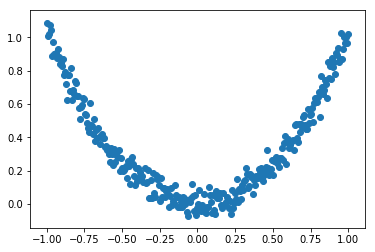

In [4]:
layer1 = add_layer(x_data, 1, 10, activation_function = tf.nn.relu)
layer2 = add_layer(layer1, 10, 5, activation_function = tf.nn.relu)
prediction = add_layer(layer2, 5, 1)

xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])

c1 = tf.square(ys - prediction)
c2 = tf.reduce_sum(c1, reduction_indices=[1])
loss = tf.reduce_mean(c2)

train = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
init = tf.global_variables_initializer()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x_data, y_data)
plt.ion()
plt.show()

with tf.Session() as sess:
    sess.run(init)
    
    for i in range(1000):
        sess.run(train, feed_dict = {xs: x_data, ys: y_data})
        
        if i % 50 == 0:
            #print(sess.run(loss, feed_dict = {xs: x_data, ys: y_data}))
            
            try:
                ax.remove(lines[0])
            except:
                pass
            
            p = sess.run(prediction, feed_dict = {xs: x_data})
            lines = ax.plot(x_data, p, 'r-', lw = 5)
            plt.pause(0.1)